<a href="https://colab.research.google.com/github/TimH2024/MSC-M5-Project/blob/main/3_Std_dataset_one_Hot_encoding%2C_Correlation%2C_feature_selection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3. Data completeness, skewness and anomalies

---

# LOAD LIBRARIES

In [ ]:

!pip install tensorflow
!pip install scikeras
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import uniform, randint
import warnings

# Suppress user warnings
warnings.filterwarnings('ignore')

# Adjust settings to display all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns


In [ ]:
# Get the files from GitHub raw URLs for the datasets
# dataset_url = 'https://raw.githubusercontent.com/TimH2024/MSC-M5-Project/main/Datasetv2.csv'
# property_dataset_url = 'https://raw.githubusercontent.com/TimH2024/MSC-M5-Project/main/Property_data_raw_2.csv'

# Read in the data sets
# dataset = pd.read_csv(dataset_url)
# property_dataset = pd.read_csv(property_dataset_url)

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/Std_Datasetv3.csv'

# Load the CSV file into a pandas DataFrame called "merged_dataset"
merged_dataset = pd.read_csv(file_path)

# Display information about the DataFrame
print("\nDataset Info:")
merged_dataset.info()  # Information about columns, data types, and memory usage

# Display the shape of the DataFrame
print("\nDataset Shape:")
print(f"Rows: {merged_dataset.shape[0]}, Columns: {merged_dataset.shape[1]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72663 entries, 0 to 72662
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   saleable_area(ft^2)  72663 non-null  int64  
 1   unit_rate            72663 non-null  int64  
 2   district             72663 non-null  object 
 3   floor                72663 non-null  float64
 4   CPI                  72663 non-null  int64  
 5   PC                   72663 non-null  int64  
 6   IR                   72663 non-null  int64  
 7   MW                   72663 non-null  int64  
 8   M3                   72663 non-null  int64  
 9   SD                   72663 non-null  int64  
 10  UR                   72663 non-null  int64  
 11  GDP                  72663 non-null  int64  
 12  CI                   72663 non-null  int64

# ONE HOT ENCODING

In [ ]:
# One-hot encoding 'district'
encoded_district = pd.get_dummies(merged_dataset['district'], prefix='district')

# Merge the one-hot encoded columns with the original dataset
merged_dataset = pd.concat([merged_dataset, encoded_district], axis=1)

# Explicitly set one-hot encoded columns to int64
merged_dataset[encoded_district.columns] = encoded_district.astype('int64')

# Display the first few rows of the updated dataset
print("Displaying the first 5 rows of the updated dataset with original 'district' column retained:")
display(merged_dataset.head())

Displaying the first 5 rows of the updated dataset with original 'district' column retained:


,saleable_area(ft^2),unit_rate,district,floor,CPI,PC,IR,MW,M3,SD,UR,GDP,CI,HSI,LTV,HS,SOLD,PG,LS,FormattedDate,new_price,YearQuarter,region,floor_height,floor_size,district_Central and Western District,district_HKIsland Eastern District,district_HKIsland Southern District,district_Kowloon Kowloon City District,district_Kowloon Kwun Tong District,district_Kowloon Sham Shui Po District,district_Kowloon Wong Tai Sin District,district_Kowloon Yau Tsim Mong District,district_Kwai Tsing District,district_New Territories East Long Ping Estate,district_New Territories East North District,district_New Territories East Sha Tin District,district_New Territories East Tai Po District,district_New Territories West Islands District,district_Tsuen Wan District,district_Tuen Mun District,district_Wan Chai District,district_Yuen Long District
0,423,15792,Kowloon Kowloon City District,22.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,6680016,2023Q1,KLN,floor_21to25,small400600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,761,15857,Kowloon Kowloon City District,12.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,12067177,2023Q1,KLN,floor_11to13,compact600800,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,320,13717,Kowloon Kowloon City District,12.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,4389440,2023Q1,KLN,floor_11to13,micro200400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,519,16541,Kowloon Kowloon City District,29.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,8584779,2023Q1,KLN,floor_26to30,small400600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,699,14721,Kowloon Kowloon City District,24.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,10289979,2023Q1,KLN,floor_21to25,compact600800,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# One-hot encoding regions
encoded_region = pd.get_dummies(merged_dataset['region'], prefix='region')

# Merge the one-hot encoded columns with the original dataset
merged_dataset = pd.concat([merged_dataset, encoded_region], axis=1)

# Explicitly set one-hot encoded columns to int64
merged_dataset[encoded_region.columns] = encoded_region.astype('int64')

# Display the first few rows of the updated dataset
print("Displaying the first 5 rows of the updated dataset with original 'region' column retained:")
display(merged_dataset.head())

Displaying the first 5 rows of the updated dataset with original 'region' column retained:


,saleable_area(ft^2),unit_rate,district,floor,CPI,PC,IR,MW,M3,SD,UR,GDP,CI,HSI,LTV,HS,SOLD,PG,LS,FormattedDate,new_price,YearQuarter,region,floor_height,floor_size,district_Central and Western District,district_HKIsland Eastern District,district_HKIsland Southern District,district_Kowloon Kowloon City District,district_Kowloon Kwun Tong District,district_Kowloon Sham Shui Po District,district_Kowloon Wong Tai Sin District,district_Kowloon Yau Tsim Mong District,district_Kwai Tsing District,district_New Territories East Long Ping Estate,district_New Territories East North District,district_New Territories East Sha Tin District,district_New Territories East Tai Po District,district_New Territories West Islands District,district_Tsuen Wan District,district_Tuen Mun District,district_Wan Chai District,district_Yuen Long District,region_HK,region_KLN,region_NTEast,region_NTWest
0,423,15792,Kowloon Kowloon City District,22.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,6680016,2023Q1,KLN,floor_21to25,small400600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,761,15857,Kowloon Kowloon City District,12.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,12067177,2023Q1,KLN,floor_11to13,compact600800,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,320,13717,Kowloon Kowloon City District,12.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,4389440,2023Q1,KLN,floor_11to13,micro200400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,519,16541,Kowloon Kowloon City District,29.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,8584779,2023Q1,KLN,floor_26to30,small400600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,699,14721,Kowloon Kowloon City District,24.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,10289979,2023Q1,KLN,floor_21to25,compact600800,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# One-hot encoding for floor_size
encoded_floor_size = pd.get_dummies(merged_dataset['floor_size'], prefix='floor_size')

# Merge the one-hot encoded columns with the original dataset
merged_dataset = pd.concat([merged_dataset, encoded_floor_size], axis=1)

# Explicitly set one-hot encoded columns to int64
merged_dataset[encoded_floor_size.columns] = encoded_floor_size.astype('int64')

# Display the first few rows of the updated dataset
print("Displaying the first 5 rows of the updated dataset with original 'floor_size' column retained:")
display(merged_dataset.head())

Displaying the first 5 rows of the updated dataset with original 'floor_size' column retained:


,saleable_area(ft^2),unit_rate,district,floor,CPI,PC,IR,MW,M3,SD,UR,GDP,CI,HSI,LTV,HS,SOLD,PG,LS,FormattedDate,new_price,YearQuarter,region,floor_height,floor_size,district_Central and Western District,district_HKIsland Eastern District,district_HKIsland Southern District,district_Kowloon Kowloon City District,district_Kowloon Kwun Tong District,district_Kowloon Sham Shui Po District,district_Kowloon Wong Tai Sin District,district_Kowloon Yau Tsim Mong District,district_Kwai Tsing District,district_New Territories East Long Ping Estate,district_New Territories East North District,district_New Territories East Sha Tin District,district_New Territories East Tai Po District,district_New Territories West Islands District,district_Tsuen Wan District,district_Tuen Mun District,district_Wan Chai District,district_Yuen Long District,region_HK,region_KLN,region_NTEast,region_NTWest,floor_size_compact600800,floor_size_large10001300,floor_size_medium8001000,floor_size_micro200400,floor_size_nano0200,floor_size_small400600
0,423,15792,Kowloon Kowloon City District,22.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,6680016,2023Q1,KLN,floor_21to25,small400600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,761,15857,Kowloon Kowloon City District,12.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,12067177,2023Q1,KLN,floor_11to13,compact600800,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,320,13717,Kowloon Kowloon City District,12.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,4389440,2023Q1,KLN,floor_11to13,micro200400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,519,16541,Kowloon Kowloon City District,29.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,8584779,2023Q1,KLN,floor_26to30,small400600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,699,14721,Kowloon Kowloon City District,24.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,10289979,2023Q1,KLN,floor_21to25,compact600800,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
# One-hot encoding for YearQuarter
encoded_YearQuarter = pd.get_dummies(merged_dataset['YearQuarter'], prefix='YearQuarter')

# Merge the one-hot encoded columns with the original dataset
merged_dataset = pd.concat([merged_dataset, encoded_YearQuarter], axis=1)

# Explicitly set one-hot encoded columns to int64
merged_dataset[encoded_YearQuarter.columns] = encoded_YearQuarter.astype('int64')

# Display the first few rows of the updated dataset
print("Displaying the first 5 rows of the updated dataset with original 'YearQuarter' column retained:")
display(merged_dataset.head())

Displaying the first 5 rows of the updated dataset with original 'YearQuarter' column retained:


,saleable_area(ft^2),unit_rate,district,floor,CPI,PC,IR,MW,M3,SD,UR,GDP,CI,HSI,LTV,HS,SOLD,PG,LS,FormattedDate,new_price,YearQuarter,region,floor_height,floor_size,district_Central and Western District,district_HKIsland Eastern District,district_HKIsland Southern District,district_Kowloon Kowloon City District,district_Kowloon Kwun Tong District,district_Kowloon Sham Shui Po District,district_Kowloon Wong Tai Sin District,district_Kowloon Yau Tsim Mong District,district_Kwai Tsing District,district_New Territories East Long Ping Estate,district_New Territories East North District,district_New Territories East Sha Tin District,district_New Territories East Tai Po District,district_New Territories West Islands District,district_Tsuen Wan District,district_Tuen Mun District,district_Wan Chai District,district_Yuen Long District,region_HK,region_KLN,region_NTEast,region_NTWest,floor_size_compact600800,floor_size_large10001300,floor_size_medium8001000,floor_size_micro200400,floor_size_nano0200,floor_size_small400600,YearQuarter_2021Q1,YearQuarter_2021Q2,YearQuarter_2021Q3,YearQuarter_2021Q4,YearQuarter_2022Q1,YearQuarter_2022Q2,YearQuarter_2022Q3,YearQuarter_2022Q4,YearQuarter_2023Q1
0,423,15792,Kowloon Kowloon City District,22.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,6680016,2023Q1,KLN,floor_21to25,small400600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,761,15857,Kowloon Kowloon City District,12.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,12067177,2023Q1,KLN,floor_11to13,compact600800,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,320,13717,Kowloon Kowloon City District,12.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,4389440,2023Q1,KLN,floor_11to13,micro200400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,519,16541,Kowloon Kowloon City District,29.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,8584779,2023Q1,KLN,floor_26to30,small400600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,699,14721,Kowloon Kowloon City District,24.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,10289979,2023Q1,KLN,floor_21to25,compact600800,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# One-hot encoding for floor height
encoded_floor_height = pd.get_dummies(merged_dataset['floor_height'], prefix='floor_height')

# Merge the one-hot encoded columns with the original dataset
merged_dataset = pd.concat([merged_dataset, encoded_floor_height], axis=1)

# Explicitly set one-hot encoded columns to int64
merged_dataset[encoded_floor_height.columns] = encoded_floor_height.astype('int64')

# Do NOT drop the original 'floor_height' column (keep it in the dataset)

# Display the first few rows of the updated dataset
print("Displaying the first 5 rows of the updated dataset with original 'floor_height' column retained:")
display(merged_dataset.head())

Displaying the first 5 rows of the updated dataset with original 'floor_height' column retained:


,saleable_area(ft^2),unit_rate,district,floor,CPI,PC,IR,MW,M3,SD,UR,GDP,CI,HSI,LTV,HS,SOLD,PG,LS,FormattedDate,new_price,YearQuarter,region,floor_height,floor_size,district_Central and Western District,district_HKIsland Eastern District,district_HKIsland Southern District,district_Kowloon Kowloon City District,district_Kowloon Kwun Tong District,district_Kowloon Sham Shui Po District,district_Kowloon Wong Tai Sin District,district_Kowloon Yau Tsim Mong District,district_Kwai Tsing District,district_New Territories East Long Ping Estate,district_New Territories East North District,district_New Territories East Sha Tin District,district_New Territories East Tai Po District,district_New Territories West Islands District,district_Tsuen Wan District,district_Tuen Mun District,district_Wan Chai District,district_Yuen Long District,region_HK,region_KLN,region_NTEast,region_NTWest,floor_size_compact600800,floor_size_large10001300,floor_size_medium8001000,floor_size_micro200400,floor_size_nano0200,floor_size_small400600,YearQuarter_2021Q1,YearQuarter_2021Q2,YearQuarter_2021Q3,YearQuarter_2021Q4,YearQuarter_2022Q1,YearQuarter_2022Q2,YearQuarter_2022Q3,YearQuarter_2022Q4,YearQuarter_2023Q1,floor_height_floor_03to05,floor_height_floor_06to08,floor_height_floor_09to10,floor_height_floor_11to13,floor_height_floor_14to15,floor_height_floor_16to18,floor_height_floor_19to20,floor_height_floor_21to25,floor_height_floor_26to30,floor_height_floor_31to35,floor_height_floor_36to40,floor_height_floor_41to45,floor_height_floor_46to50,floor_height_floor_above50,floor_height_floor_house03
0,423,15792,Kowloon Kowloon City District,22.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,6680016,2023Q1,KLN,floor_21to25,small400600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,761,15857,Kowloon Kowloon City District,12.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,12067177,2023Q1,KLN,floor_11to13,compact600800,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,320,13717,Kowloon Kowloon City District,12.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,4389440,2023Q1,KLN,floor_11to13,micro200400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,519,16541,Kowloon Kowloon City District,29.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,8584779,2023Q1,KLN,floor_26to30,small400600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,699,14721,Kowloon Kowloon City District,24.0,0,351,3,18,17,0,3,90,66,20400,1,2184,4968,0,0,2023-03-08,10289979,2023Q1,KLN,floor_21to25,compact600800,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
merged_dataset.shape

(72663, 77)

# FEATURE SELECTION

In [ ]:
# Import necessary libraries
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Mutual Selection method for `new_price`

# Step 1: Define X and y for `new_price`
X = merged_dataset.drop(columns=['new_price', 'PC'], errors='ignore')  # Exclude target columns from features
y_new_price = merged_dataset['new_price']  # Target variable

# Step 2: Randomly sample 20,000 rows
sampled_data = X.sample(n=20000, random_state=42)  # Random sample of 20,000 rows
sampled_targets_new_price = y_new_price.loc[sampled_data.index]  # Match sampled rows for `new_price`

# Step 3: Identify categorical columns
categorical_columns = sampled_data.select_dtypes(include=['object']).columns

# Step 4: Use Label Encoding for categorical columns
sampled_data_encoded = sampled_data.copy()
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    sampled_data_encoded[col] = le.fit_transform(sampled_data[col].astype(str))
    label_encoders[col] = le

# Step 5: Exclude obvious or redundant features and multicollinearity
features_to_exclude = [col for col in sampled_data_encoded.columns if col.startswith(("floor_size_", "district_", "YearQuarter_", "region_"))] + ['property_size', 'YearQuarter', 'FormattedDate', 'unit_rate']
sampled_data_filtered = sampled_data_encoded.drop(columns=features_to_exclude, errors='ignore')

# Step 6: Compute Mutual Information for `new_price`
mi_new_price = mutual_info_regression(sampled_data_filtered, sampled_targets_new_price)

# Step 7: Create DataFrame for results
mi_new_price_df = pd.DataFrame({'Feature': sampled_data_filtered.columns, 'Mutual Information': mi_new_price})
mi_new_price_df['Target'] = 'new_price'  # Add a column to indicate the target variable

# Sort the DataFrame by mutual information in descending order
mi_new_price_df = mi_new_price_df.sort_values(by='Mutual Information', ascending=False)

# Print the top 10 features for `new_price`
print("Top 10 features for new_price based on Mutual Information:")
print(mi_new_price_df.head(10).to_string(index=False))  # Print without the index

# Save the results to a CSV file
mi_new_price_df.to_csv('mi_new_price.csv', index=False)
print("\nMutual Information results for `new_price` saved to 'mi_new_price.csv'.")

Top 10 features for new_price based on Mutual Information:
            Feature  Mutual Information    Target
saleable_area(ft^2)            1.164828 new_price
         floor_size            0.491244 new_price
              floor            0.398045 new_price
       floor_height            0.303687 new_price
                HSI            0.296498 new_price
                 CI            0.295175 new_price
                 IR            0.197987 new_price
                 LS            0.169795 new_price
                 UR            0.151851 new_price
                 M3            0.106171 new_price

Mutual Information results for `new_price` saved to 'mi_new_price.csv'.


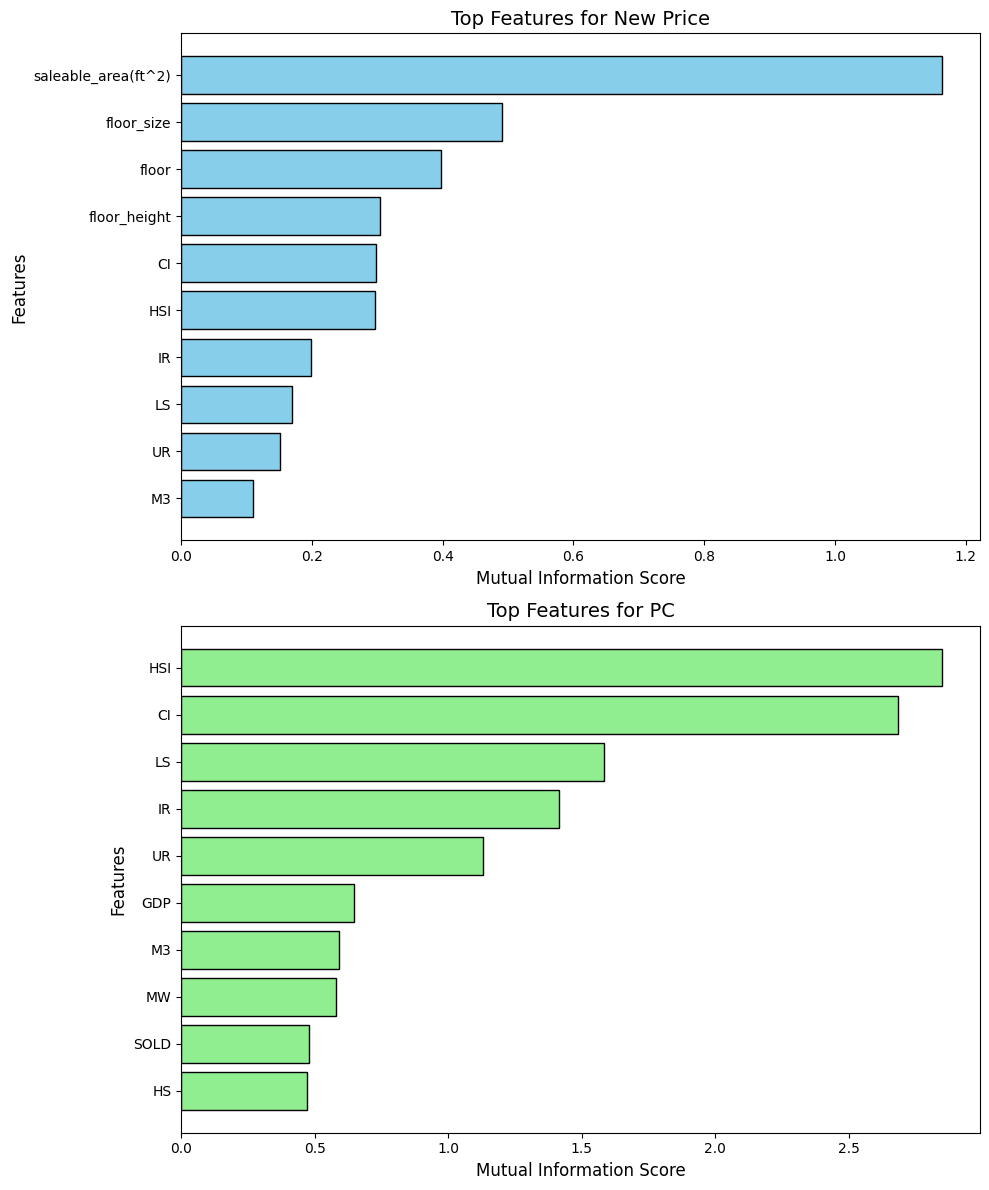

In [ ]:

# Feature graphs

# Step 1: Load the master_selection.csv file
master_df = pd.read_csv("master_selection.csv")

# Step 2: Filter top 10 features for each target
top_features_new_price = (
    master_df[master_df["Target"] == "new_price"]
    .sort_values(by="Mutual Information", ascending=False)
    .head(10)
)
top_features_PC = (
    master_df[master_df["Target"] == "PC"]
    .sort_values(by="Mutual Information", ascending=False)
    .head(10)
)

# Step 3: Create a single figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))  # Two rows, one column

# Plot for `new_price`
axes[0].barh(
    top_features_new_price["Feature"],
    top_features_new_price["Mutual Information"],
    color="skyblue",
    edgecolor="black"
)
axes[0].set_xlabel("Mutual Information Score", fontsize=12)
axes[0].set_ylabel("Features", fontsize=12)
axes[0].set_title("Top Features for New Price", fontsize=14)
axes[0].invert_yaxis()  # Highest-ranked feature at the top

# Plot for `PC`
axes[1].barh(
    top_features_PC["Feature"],
    top_features_PC["Mutual Information"],
    color="lightgreen",
    edgecolor="black"
)
axes[1].set_xlabel("Mutual Information Score", fontsize=12)
axes[1].set_ylabel("Features", fontsize=12)
axes[1].set_title("Top Features for PC", fontsize=14)
axes[1].invert_yaxis()  # Highest-ranked feature at the top

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
merged_dataset.columns

Index(['saleable_area(ft^2)', 'unit_rate', 'district', 'floor', 'CPI', 'PC',
       'IR', 'MW', 'M3', 'SD', 'UR', 'GDP', 'CI', 'HSI', 'LTV', 'HS', 'SOLD',
       'PG', 'LS', 'FormattedDate', 'new_price', 'YearQuarter', 'region',
       'floor_height', 'floor_size', 'district_Central and Western District',
       'district_HKIsland Eastern District',
       'district_HKIsland Southern District',
       'district_Kowloon Kowloon City District',
       'district_Kowloon Kwun Tong District',
       'district_Kowloon Sham Shui Po District',
       'district_Kowloon Wong Tai Sin District',
       'district_Kowloon Yau Tsim Mong District',
       'district_Kwai Tsing District',
       'district_New Territories East Long Ping Estate',
       'district_New Territories East North District',
       'district_New Territories East Sha Tin District',
       'district_New Territories East Tai Po District',
       'district_New Territories West Islands District',
       'district_Tsuen Wan District', 

# CORRELATION ANALYSIS

## Expected Features

Correlation of features with 'new_price':
new_price              1.000000
saleable_area(ft^2)    0.725791
floor                  0.269042
Name: new_price, dtype: float64


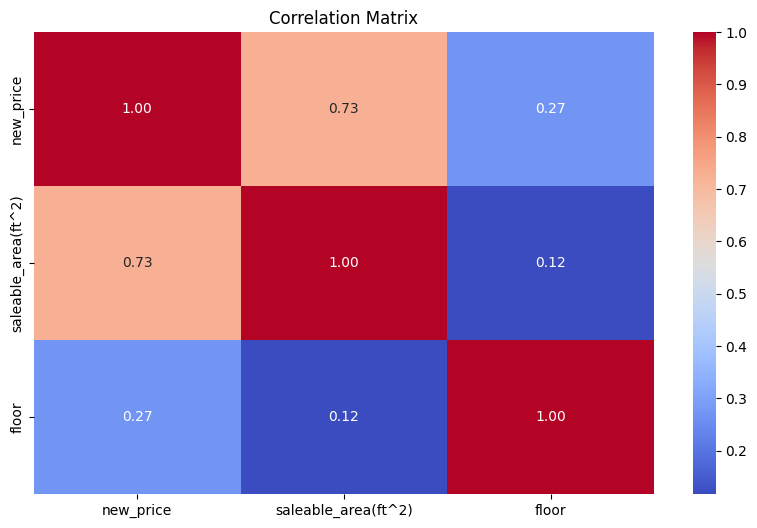

In [ ]:

# Focused features and target
features = ['saleable_area(ft^2)', 'district', 'floor', 'region', 'YearQuarter']
target = 'new_price'

# Step 1: Verify the columns exist in the dataset
existing_features = [col for col in features if col in merged_dataset.columns]
if target not in merged_dataset.columns:
    print(f"The target column '{target}' does not exist in the dataset.")
else:
    if not existing_features:
        print("None of the specified feature columns exist in the dataset.")
    else:
        # Step 2: Select relevant columns (target + existing features)
        correlation_data = merged_dataset[[target] + existing_features]

        # Step 3: Check data types and encode non-numeric features
        # Automatically encode categorical features like 'district', 'region', etc.
        correlation_data = pd.get_dummies(correlation_data, drop_first=True)

        # Step 4: Calculate the correlation matrix
        correlation_matrix = correlation_data.corr()

        # Step 5: Focus on correlations with `new_price`
        new_price_correlation = correlation_matrix[target].sort_values(ascending=False)

        # Display the correlation values
        print("Correlation of features with 'new_price':")
        print(new_price_correlation)

        # Optional: Visualize the correlation matrix
        import seaborn as sns
        import matplotlib.pyplot as plt

        plt.figure(figsize=(10, 6))
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
        plt.title("Correlation Matrix")
        plt.show()

Correlation of features with 'PC':
PC      1.000000
CI      0.711906
HSI     0.688539
SOLD    0.675486
UR      0.670598
GDP     0.381953
CPI    -0.085750
LS     -0.462783
M3     -0.463455
HS     -0.675486
MW     -0.747059
IR     -0.930905
Name: PC, dtype: float64


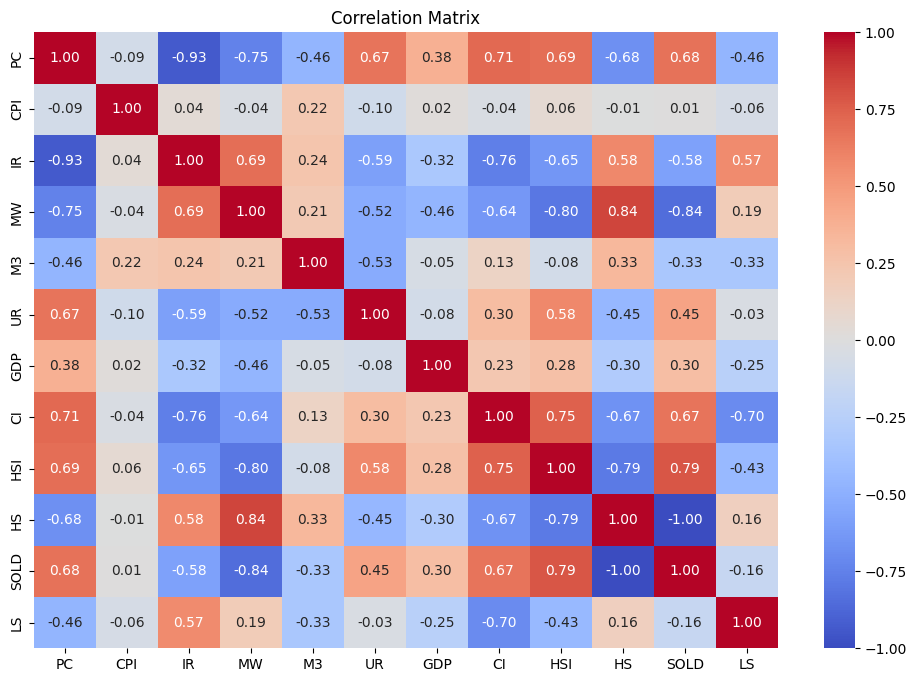

In [ ]:
# Focused features and target
features = [
    'CPI', 'IR', 'MW', 'M3', 'UR', 'GDP', 'CI',
    'HSI', 'HS', 'SOLD', 'LS'
]
target = 'PC'  # Set target to 'PC'

# Step 1: Verify the columns exist in the dataset
existing_features = [col for col in features if col in merged_dataset.columns]
if target not in merged_dataset.columns:
    print(f"The target column '{target}' does not exist in the dataset.")
else:
    if not existing_features:
        print("None of the specified feature columns exist in the dataset.")
    else:
        # Step 2: Select relevant columns (target + existing features)
        correlation_data = merged_dataset[[target] + existing_features]

        # Step 3: Handle missing or non-numeric data
        # Remove rows with missing values
        correlation_data = correlation_data.dropna()

        # Automatically encode categorical features if any (no dummies needed for numeric features)
        correlation_data = pd.get_dummies(correlation_data, drop_first=True)

        # Step 4: Calculate the correlation matrix
        correlation_matrix = correlation_data.corr()

        # Step 5: Focus on correlations with `PC`
        pc_correlation = correlation_matrix[target].sort_values(ascending=False)

        # Display the correlation values
        print("Correlation of features with 'PC':")
        print(pc_correlation)

        # Optional: Visualize the correlation matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
        plt.title("Correlation Matrix")
        plt.show()

## Correlation with Location

Correlation of features with 'new_price':
new_price              1.000000
saleable_area(ft^2)    0.725791
floor                  0.269042
region_HK              0.082260
region_NTEast         -0.017554
region_KLN            -0.027934
region_NTWest         -0.030660
Name: new_price, dtype: float64


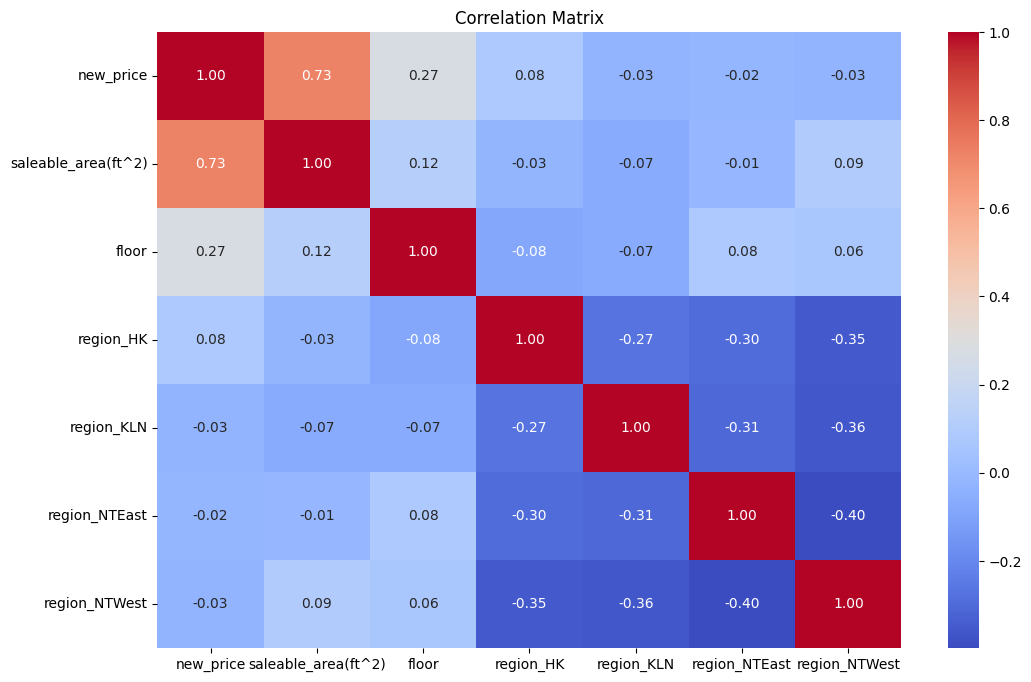

In [ ]:

# Focused features and target
features = ['saleable_area(ft^2)', 'district', 'floor', 'YearQuarter',
            'region_HK', 'region_KLN', 'region_NTEast', 'region_NTWest']
target = 'new_price'

# Step 1: Verify the columns exist in the dataset
existing_features = [col for col in features if col in merged_dataset.columns]
if target not in merged_dataset.columns:
    print(f"The target column '{target}' does not exist in the dataset.")
else:
    if not existing_features:
        print("None of the specified feature columns exist in the dataset.")
    else:
        # Step 2: Select relevant columns (target + existing features)
        correlation_data = merged_dataset[[target] + existing_features]

        # Step 3: Handle missing or non-numeric data
        # Remove rows with missing values
        correlation_data = correlation_data.dropna()

        # If districts or other categorical features need encoding, handle them
        correlation_data = pd.get_dummies(correlation_data, drop_first=True)

        # Step 4: Calculate the correlation matrix
        correlation_matrix = correlation_data.corr()

        # Step 5: Focus on correlations with `new_price`
        new_price_correlation = correlation_matrix[target].sort_values(ascending=False)

        # Display the correlation values
        print("Correlation of features with 'new_price':")
        print(new_price_correlation)

        # Optional: Visualize the correlation matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
        plt.title("Correlation Matrix")
        plt.show()

Correlation of features with 'new_price':
new_price                                         1.000000
district_New Territories East Long Ping Estate    0.126826
district_New Territories West Islands District    0.084783
district_HKIsland Southern District               0.066816
district_HKIsland Eastern District                0.065264
district_Yuen Long District                       0.040965
district_Central and Western District             0.031277
district_Wan Chai District                        0.027640
district_Tsuen Wan District                       0.019783
district_Kowloon Kowloon City District           -0.000937
district_Kowloon Sham Shui Po District           -0.004705
district_Kowloon Yau Tsim Mong District          -0.009843
district_Kowloon Wong Tai Sin District           -0.014375
district_New Territories East Sha Tin District   -0.017767
district_Kowloon Kwun Tong District              -0.034250
district_Kwai Tsing District                     -0.039895
district_New T

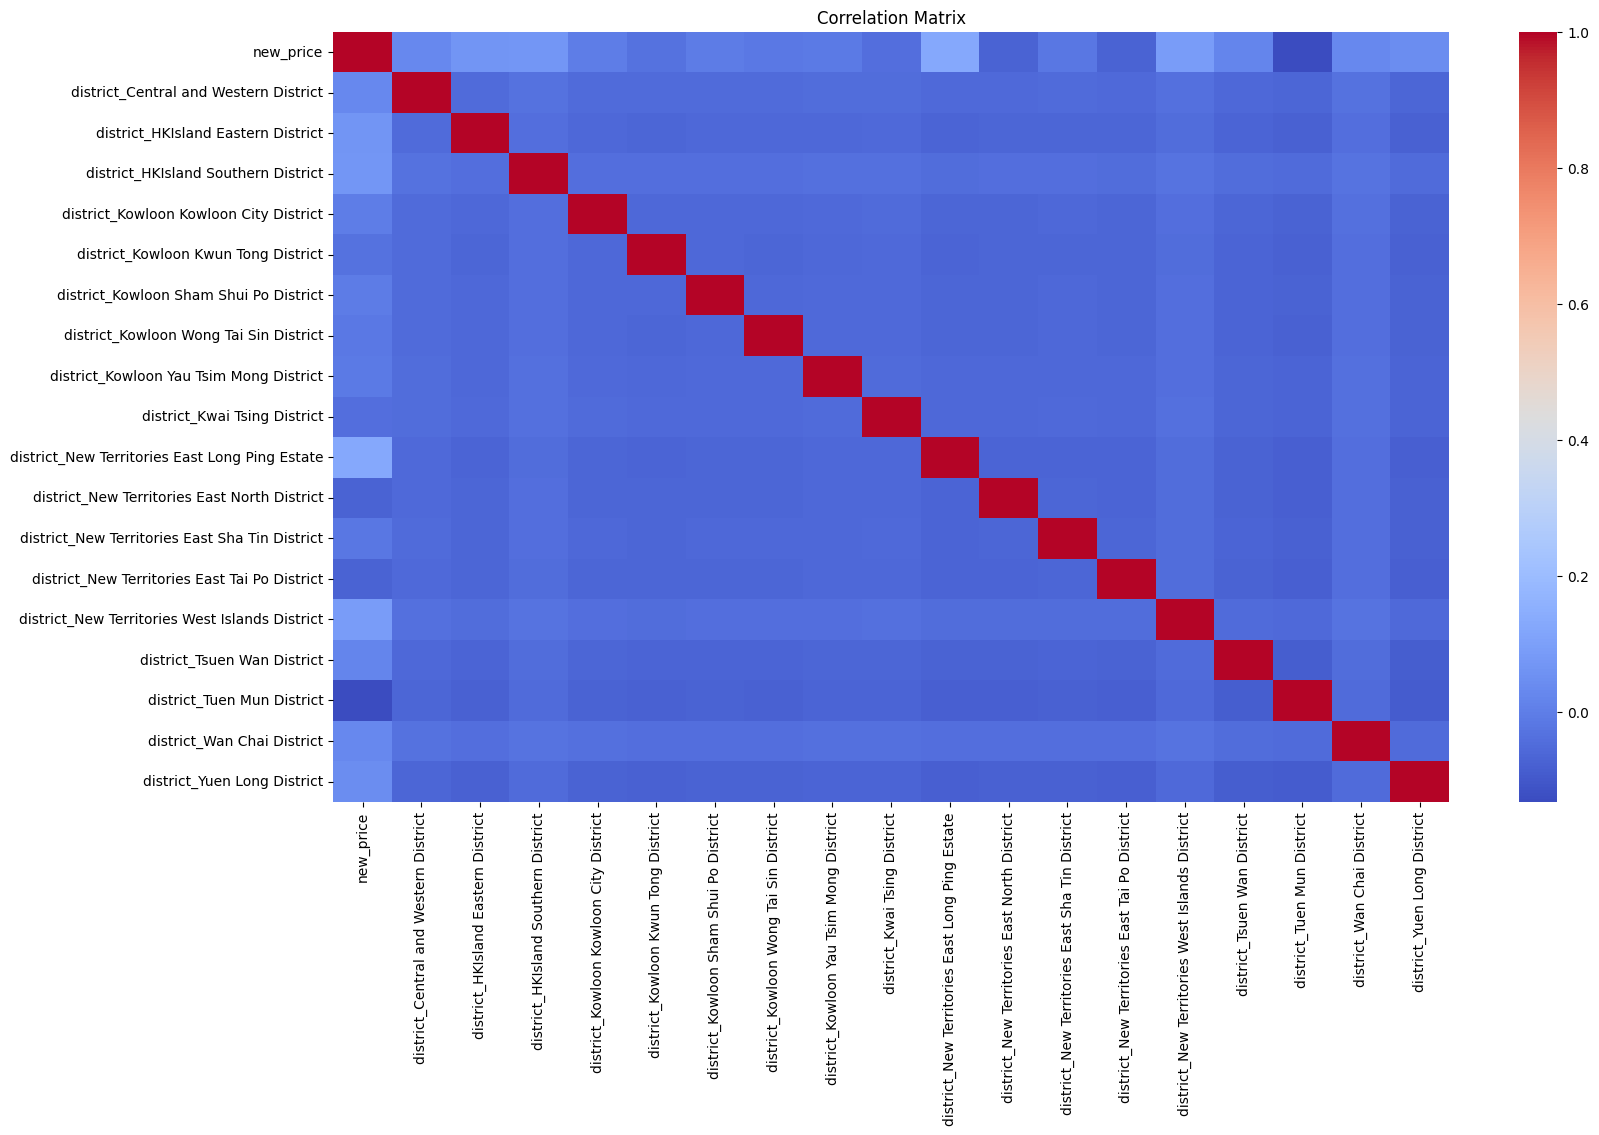

In [ ]:

# Focused features (including encoded districts) and target
features = [
    # Encoded districts
    'district_Central and Western District',
    'district_HKIsland Eastern District',
    'district_HKIsland Southern District',
    'district_Kowloon Kowloon City District',
    'district_Kowloon Kwun Tong District',
    'district_Kowloon Sham Shui Po District',
    'district_Kowloon Wong Tai Sin District',
    'district_Kowloon Yau Tsim Mong District',
    'district_Kwai Tsing District',
    'district_New Territories East Long Ping Estate',
    'district_New Territories East North District',
    'district_New Territories East Sha Tin District',
    'district_New Territories East Tai Po District',
    'district_New Territories West Islands District',
    'district_Tsuen Wan District',
    'district_Tuen Mun District',
    'district_Wan Chai District',
    'district_Yuen Long District'
]
target = 'new_price'

# Step 1: Verify the columns exist in the dataset
existing_features = [col for col in features if col in merged_dataset.columns]
if target not in merged_dataset.columns:
    print(f"The target column '{target}' does not exist in the dataset.")
else:
    if not existing_features:
        print("None of the specified feature columns exist in the dataset.")
    else:
        # Step 2: Select relevant columns (target + existing features)
        correlation_data = merged_dataset[[target] + existing_features]

        # Step 3: Handle missing or non-numeric data
        # Remove rows with missing values
        correlation_data = correlation_data.dropna()

        # If there are any remaining categorical features, encode them
        correlation_data = pd.get_dummies(correlation_data, drop_first=True)

        # Step 4: Calculate the correlation matrix
        correlation_matrix = correlation_data.corr()

        # Step 5: Focus on correlations with `new_price`
        new_price_correlation = correlation_matrix[target].sort_values(ascending=False)

        # Display the correlation values
        print("Correlation of features with 'new_price':")
        print(new_price_correlation)

        # Optional: Visualize the correlation matrix
        plt.figure(figsize=(18, 10))
        sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)
        plt.title("Correlation Matrix")
        plt.show()

## Floor Height

Correlation of features with 'new_price':
new_price                     1.000000
floor_height_floor_46to50     0.122818
floor_height_floor_above50    0.122447
floor_height_floor_36to40     0.113441
floor_height_floor_41to45     0.091657
floor_height_floor_31to35     0.061720
floor_height_floor_26to30     0.061397
floor_height_floor_21to25     0.023318
floor_height_floor_16to18     0.016572
floor_height_floor_19to20     0.001383
floor_height_floor_14to15    -0.027148
floor_height_floor_11to13    -0.031705
floor_height_floor_09to10    -0.050779
floor_height_floor_house03   -0.060682
floor_height_floor_06to08    -0.066861
floor_height_floor_03to05    -0.104692
Name: new_price, dtype: float64


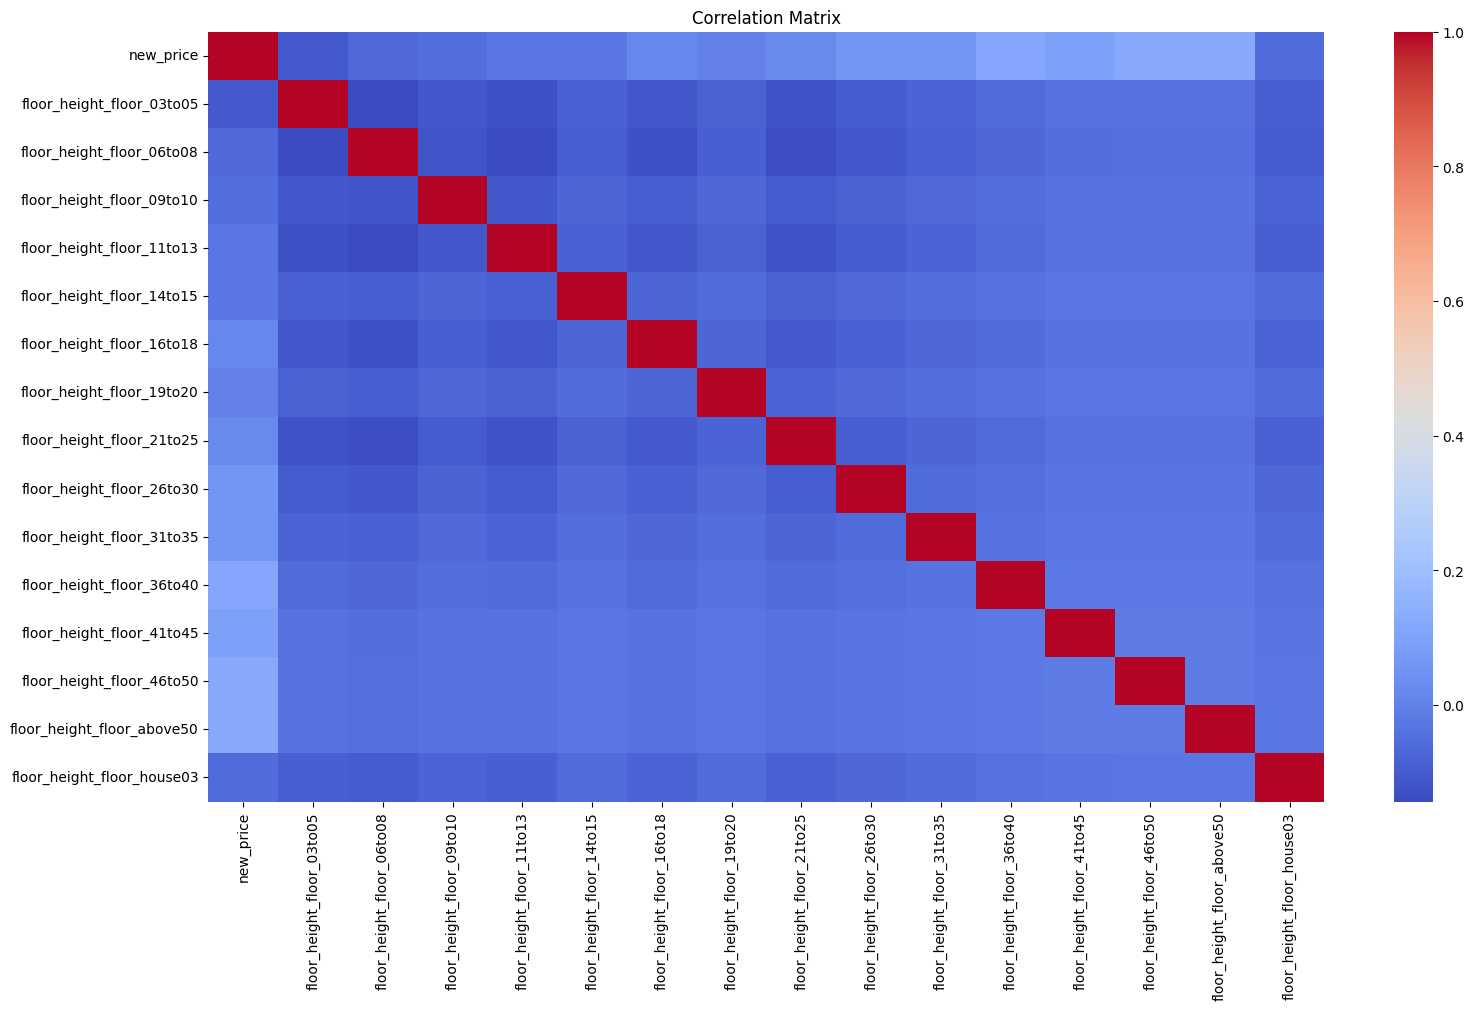

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Focused features (including encoded floor height and YearQuarter) and target
features = [
    # Encoded floor height
    'floor_height_floor_03to05', 'floor_height_floor_06to08', 'floor_height_floor_09to10',
    'floor_height_floor_11to13', 'floor_height_floor_14to15', 'floor_height_floor_16to18',
    'floor_height_floor_19to20', 'floor_height_floor_21to25', 'floor_height_floor_26to30',
    'floor_height_floor_31to35', 'floor_height_floor_36to40', 'floor_height_floor_41to45',
    'floor_height_floor_46to50', 'floor_height_floor_above50', 'floor_height_floor_house03'
]
target = 'new_price'

# Step 1: Verify the columns exist in the dataset
existing_features = [col for col in features if col in merged_dataset.columns]
if target not in merged_dataset.columns:
    print(f"The target column '{target}' does not exist in the dataset.")
else:
    if not existing_features:
        print("None of the specified feature columns exist in the dataset.")
    else:
        # Step 2: Select relevant columns (target + existing features)
        correlation_data = merged_dataset[[target] + existing_features]

        # Step 3: Handle missing or non-numeric data
        # Remove rows with missing values
        correlation_data = correlation_data.dropna()

        # If there are any remaining categorical features, encode them
        correlation_data = pd.get_dummies(correlation_data, drop_first=True)

        # Step 4: Calculate the correlation matrix
        correlation_matrix = correlation_data.corr()

        # Step 5: Focus on correlations with `new_price`
        new_price_correlation = correlation_matrix[target].sort_values(ascending=False)

        # Display the correlation values
        print("Correlation of features with 'new_price':")
        print(new_price_correlation)

        # Optional: Visualize the correlation matrix
        plt.figure(figsize=(18, 10))
        sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)
        plt.title("Correlation Matrix")
        plt.show()

# PRICE DISTRIBUTION

In [ ]:
# Display only object (string) columns in merged_dataset
object_columns = merged_dataset.select_dtypes(include=['object'])

# Display the information about object columns
print(object_columns.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72663 entries, 0 to 72662
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   district       72663 non-null  object
 1   FormattedDate  72663 non-null  object
 2   YearQuarter    72663 non-null  object
 3   region         72663 non-null  object
 4   floor_height   72663 non-null  object
 5   floor_size     72663 non-null  object
dtypes: object(6)
memory usage: 3.3+ MB
None


In [ ]:
import pandas as pd

# Display the initial shape of the dataset
print("Initial dataset shape:", merged_dataset.shape)

# Identify and drop all object (string) columns
object_columns = merged_dataset.select_dtypes(include=['object']).columns
print(f"Identified object columns to drop: {list(object_columns)}")

# Drop the object columns from the dataset
merged_dataset = merged_dataset.drop(columns=object_columns)

# Display the updated dataset information
print("Updated dataset shape:", merged_dataset.shape)
print("Remaining columns:")
print(merged_dataset.info())

Initial dataset shape: (72663, 77)
Identified object columns to drop: ['district', 'FormattedDate', 'YearQuarter', 'region', 'floor_height', 'floor_size']
Updated dataset shape: (72663, 71)
Remaining columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72663 entries, 0 to 72662
Data columns (total 71 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   saleable_area(ft^2)                             72663 non-null  int64  
 1   unit_rate                                       72663 non-null  int64  
 2   floor                                           72663 non-null  float64
 3   CPI                                             72663 non-null  int64  
 4   PC                                              72663 non-null  int64  
 5   IR                                              72663 non-null  int64  
 6   MW                                              72663 non-nul

## Save the Dataframe

In [ ]:
merged_dataset.shape

(72663, 71)

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72663 entries, 0 to 72662
Data columns (total 71 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   saleable_area(ft^2)                             72663 non-null  int64  
 1   unit_rate                                       72663 non-null  int64  
 2   floor                                           72663 non-null  float64
 3   CPI                                             72663 non-null  int64  
 4   PC                                              72663 non-null  int64  
 5   IR                                              72663 non-null  int64  
 6   MW                                              72663 non-null  int64  
 7   M3                                              72663 non-null  int64  
 8   SD                                              72663 non-null  int64  
 9   UR                                     

In [ ]:
# Save the merged dataset to a new CSV file
merged_dataset.to_csv('Std_Datasetv4.csv', index=False)

In [ ]:
# Mount Google Drive
from google.colab import drive
import os

drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/Std_Datasetv4.csv'

# Save the file
merged_dataset.to_csv(file_path, index=False)

# Verify if the file exists
if os.path.exists(file_path):
    print(f"File 'Std_Datasetv4.csv' has been saved successfully!")
    print(f"Full file path: {file_path}")
else:
    print(f"File 'Std_Datasetv4.csv' was not found in the directory!")

# Optionally unmount and remount Google Drive
drive.flush_and_unmount()
print("Drive unmounted. Please refresh Google Drive and remount if necessary.")

Mounted at /content/drive
File 'Std_Datasetv4.csv' has been saved successfully!
Full file path: /content/drive/My Drive/Colab Notebooks/M5 Code and Data/Std_Datasetv4.csv
Drive unmounted. Please refresh Google Drive and remount if necessary.
